# Análise de Vibração em Sistemas Massa-Mola

### Fundamento Teórico:

O movimento de um sistema massa-mola não amortecido é descrito pela seguinte equação diferencial matricial:

$$ [M] \ddot{\vec{x}} + [K] \vec{x} = \vec{0} $$

Onde:
- $[M]$ é a **matriz de massa** (geralmente diagonal).
- $[K]$ é a **matriz de rigidez**.
- $\vec{x}$ é o vetor de deslocamentos das massas.
- $\ddot{\vec{x}}$ é o vetor de acelerações das massas.

Para encontrar as frequências naturais, assumimos uma solução harmônica da forma $\vec{x}(t) = \vec{v} e^{i\omega t}$, onde $\vec{v}$ é o vetor de amplitudes (o modo normal) e $\omega$ é a frequência natural. Substituindo na equação, obtemos o **problema de autovalor generalizado**:

$$ ([K] - \omega^2 [M]) \vec{v} = \vec{0} $$

Este problema tem soluções não triviais ($\vec{v} \neq \vec{0}$) somente se o determinante da matriz for nulo. A solução nos fornece os autovalores $\lambda = \omega^2$ e os autovetores correspondentes $\vec{v}$ (modos normais).

As frequências naturais são, portanto, $\omega = \sqrt{\lambda}$.

In [1]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

In [2]:
diagrama = """
flowchart TD
    A([Início]) --> B[Importação das Bibliotecas];
    B --> C["Definição da Classe de Simulação<br>(MassSpringSystem)"];
    
    subgraph Análises Realizadas
        direction LR
        C --> D["Análise de Sistema de 2 Massas<br>(Variação de massa)"];
        C --> E["Análise de Sistema de 3 Massas<br>(Comparativo de configurações)"];
        C --> F["Análise Paramétrica<br>(Variação das constantes de mola)"];
        C --> G["Geração de Animações<br>dos Modos de Vibração"];
    end

    G --> Z([Fim]);
    F --> Z;
    E --> Z;
    D --> Z;
"""

mm(diagrama)

In [3]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Configurando a impressão do numpy para melhor visualização
np.set_printoptions(precision=4, suppress=True)

def resolver_sistema(M, K):
    """
    Resolve o problema de autovalor para encontrar as frequências e modos normais.
    
    Argumentos:
    M (np.array): Matriz de massa
    K (np.array): Matriz de rigidez
    
    Retorna:
    frequencias (np.array): Vetor com as frequências naturais (rad/s)
    modos_normais (np.array): Matriz onde cada coluna é um modo normal de vibração
    """
    # O problema é K*v = w^2*M*v
    # Reorganizamos para: inv(M)*K*v = w^2*v, um problema de autovalor padrão A*v = lambda*v
    M_inv = np.linalg.inv(M)
    A = M_inv @ K
    
    # Resolve o problema de autovalor para A
    autovalores, autovetores = np.linalg.eig(A)
    
    # Ordena os resultados para consistência
    indices_ordenados = np.argsort(autovalores)
    autovalores_ordenados = autovalores[indices_ordenados]
    modos_normais_ordenados = autovetores[:, indices_ordenados]
    
    frequencias_naturais = np.sqrt(autovalores_ordenados)
    
    return frequencias_naturais, modos_normais_ordenados

def plotar_modos(frequencias, modos_normais, titulo):
    """Função para plotar os modos normais de vibração."""
    num_massas = modos_normais.shape[0]
    num_modos = modos_normais.shape[1]
    posicoes_massas = np.arange(1, num_massas + 1)
    
    fig, axes = plt.subplots(1, num_modos, figsize=(5 * num_modos, 4), sharey=True)
    fig.suptitle(f"Modos Normais de Vibração - {titulo}", fontsize=16)
    
    if num_modos == 1: axes = [axes] # Garante que 'axes' seja sempre iterável

    for i in range(num_modos):
        ax = axes[i]
        modo = modos_normais[:, i]
        modo_normalizado = modo / np.max(np.abs(modo))
        
        # Adiciona as paredes (deslocamento zero) no início e no fim
        x_plot = np.concatenate(([0], posicoes_massas, [num_massas + 1]))
        y_plot = np.concatenate(([0], modo_normalizado, [0]))
        
        ax.plot(x_plot, y_plot, 'o--', color='dodgerblue', markerfacecolor='red', markersize=8)
        ax.axhline(0, color='black', linestyle=':', linewidth=1)
        
        ax.set_title(f"Modo {i+1}\nω = {frequencias[i]:.4f} rad/s")
        ax.set_xlabel("Posição")
        ax.set_xticks(x_plot)
        ax.set_xticklabels(['Parede'] + [f'm{j}' for j in range(1, num_massas + 1)] + ['Parede'])
        ax.grid(True, linestyle='--', alpha=0.6)

    axes[0].set_ylabel("Deslocamento Relativo")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def imprimir_e_plotar_resultados(frequencias, modos_normais, titulo):
    """Função para imprimir os resultados numéricos e chamar a plotagem."""
    print("-" * 60)
    print(titulo)
    print("-" * 60)
    for i in range(len(frequencias)):
        print(f"Frequência Natural {i+1} (ω_{i+1}): {frequencias[i]:.4f} rad/s")
        modo_normalizado = modos_normais[:, i] / np.max(np.abs(modos_normais[:, i]))
        print(f"Modo Normal {i+1} (deslocamentos relativos): {modo_normalizado}\n")
    
    plotar_modos(frequencias, modos_normais, titulo)

## 1. Sistema com Duas Massas e Extremos Fixos

Vamos modelar o sistema abaixo:

`Parede --- mola(k1) --- [m1] --- mola(k2) --- [m2] --- mola(k3) --- Parede`

A matriz de massa $[M]$ e a matriz de rigidez $[K]$ são:

$$
[M] = \begin{bmatrix} m_1 & 0 \\ 0 & m_2 \end{bmatrix}
\quad
[K] = \begin{bmatrix} k_1+k_2 & -k_2 \\ -k_2 & k_2+k_3 \end{bmatrix}
$$

#### 1.1. Caso Base: Massas e Molas Iguais

Inicialmente, `m1 = m2 = 1 kg` e `k1 = k2 = k3 = 1 N/m`.

------------------------------------------------------------
Caso Base: m1=1, m2=1, k=1
------------------------------------------------------------
Frequência Natural 1 (ω_1): 1.0000 rad/s
Modo Normal 1 (deslocamentos relativos): [1. 1.]

Frequência Natural 2 (ω_2): 1.7321 rad/s
Modo Normal 2 (deslocamentos relativos): [ 1. -1.]



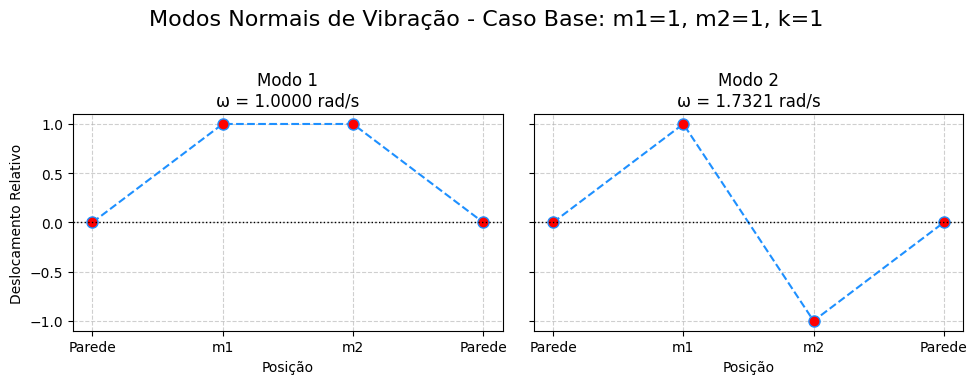

In [4]:
# 1.1. Sistema de 2 massas - Caso Base
m1, m2 = 1.0, 1.0
k1, k2, k3 = 1.0, 1.0, 1.0

M = np.array([[m1, 0], [0, m2]])
K = np.array([[k1 + k2, -k2], [-k2, k2 + k3]])

frequencias, modos = resolver_sistema(M, K)
imprimir_e_plotar_resultados(frequencias, modos, "Caso Base: m1=1, m2=1, k=1")

**Análise do Caso Base:**
- **Modo 1 (baixa frequência):** As duas massas se movem na mesma direção (em fase).
- **Modo 2 (alta frequência):** As duas massas se movem em direções opostas (fora de fase).

#### 1.2. Variando a Massa `m2`

Agora, vamos manter `m1 = 1 kg` e `k = 1 N/m` fixos, mas variar o valor de `m2` para observar o impacto nas frequências e nos modos.

------------------------------------------------------------
Variação: m1=1, m2=2.0, k=1
------------------------------------------------------------
Frequência Natural 1 (ω_1): 0.7962 rad/s
Modo Normal 1 (deslocamentos relativos): [0.7321 1.    ]

Frequência Natural 2 (ω_2): 1.5382 rad/s
Modo Normal 2 (deslocamentos relativos): [ 1.    -0.366]



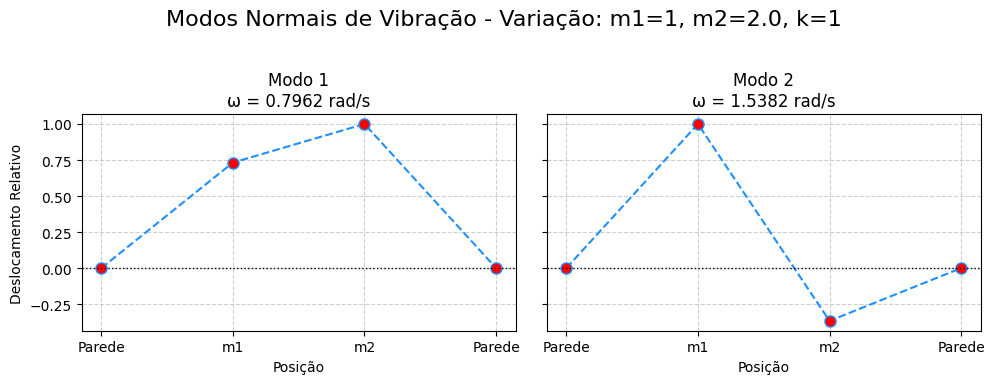

------------------------------------------------------------
Variação: m1=1, m2=10.0, k=1
------------------------------------------------------------
Frequência Natural 1 (ω_1): 0.3822 rad/s
Modo Normal 1 (deslocamentos relativos): [0.5394 1.    ]

Frequência Natural 2 (ω_2): 1.4332 rad/s
Modo Normal 2 (deslocamentos relativos): [ 1.     -0.0539]



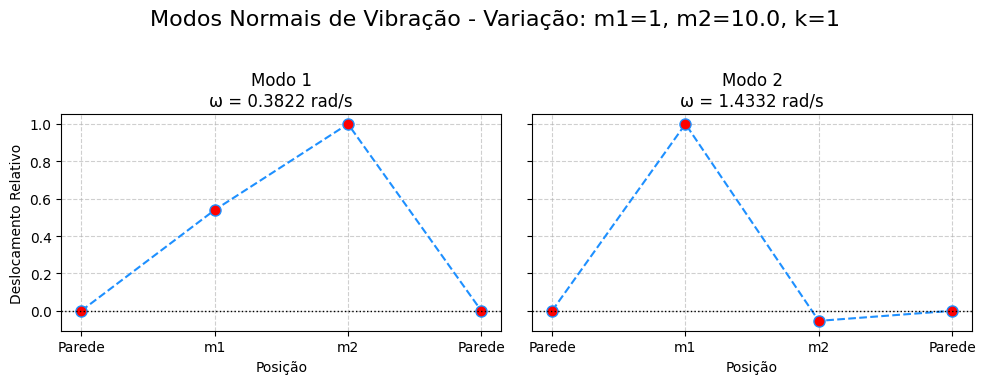

In [5]:
# 1.2. Sistema de 2 massas - Variando m2
m1 = 1.0
k1, k2, k3 = 1.0, 1.0, 1.0
valores_m2 = [2.0, 10.0] # Reduzido para 2 casos para economizar espaço

for m2_teste in valores_m2:
    M = np.array([[m1, 0], [0, m2_teste]])
    K = np.array([[k1 + k2, -k2], [-k2, k2 + k3]])
    
    frequencias, modos = resolver_sistema(M, K)
    titulo = f"Variação: m1=1, m2={m2_teste}, k=1"
    imprimir_e_plotar_resultados(frequencias, modos, titulo)

**Análise da Variação de `m2`:**
- **Frequências:** Ambas as frequências naturais **diminuem** à medida que `m2` aumenta. Isso é esperado, pois aumentar a massa de um sistema o torna "mais lento" ou mais inercial.
- **Modos Normais:**
    - **Modo 1 (em fase):** A amplitude de deslocamento de `m2` se torna progressivamente maior que a de `m1`. A massa mais pesada domina o movimento.
    - **Modo 2 (fora de fase):** O deslocamento relativo de `m2` diminui drasticamente. A massa mais pesada (`m2`) tende a se mover muito pouco, agindo quase como um ponto fixo (um "nó" vibracional), enquanto a massa mais leve (`m1`) oscila contra ela.

---

## 2. Extensão para Três Massas com Extremos Fixos

O sistema agora é:

`Parede --- k1 --- [m1] --- k2 --- [m2] --- k3 --- [m3] --- k4 --- Parede`

As matrizes para este sistema são:

$$
[M] = \begin{bmatrix} m_1 & 0 & 0 \\ 0 & m_2 & 0 \\ 0 & 0 & m_3 \end{bmatrix}
\quad
[K] = \begin{bmatrix} k_1+k_2 & -k_2 & 0 \\ -k_2 & k_2+k_3 & -k_3 \\ 0 & -k_3 & k_3+k_4 \end{bmatrix}
$$

Vamos estudar diferentes distribuições de massa, mantendo `k=1 N/m` para todas as molas.

------------------------------------------------------------
Massas Iguais (1, 1, 1)
------------------------------------------------------------
Frequência Natural 1 (ω_1): 0.7654 rad/s
Modo Normal 1 (deslocamentos relativos): [0.7071 1.     0.7071]

Frequência Natural 2 (ω_2): 1.4142 rad/s
Modo Normal 2 (deslocamentos relativos): [-1.  0.  1.]

Frequência Natural 3 (ω_3): 1.8478 rad/s
Modo Normal 3 (deslocamentos relativos): [-0.7071  1.     -0.7071]



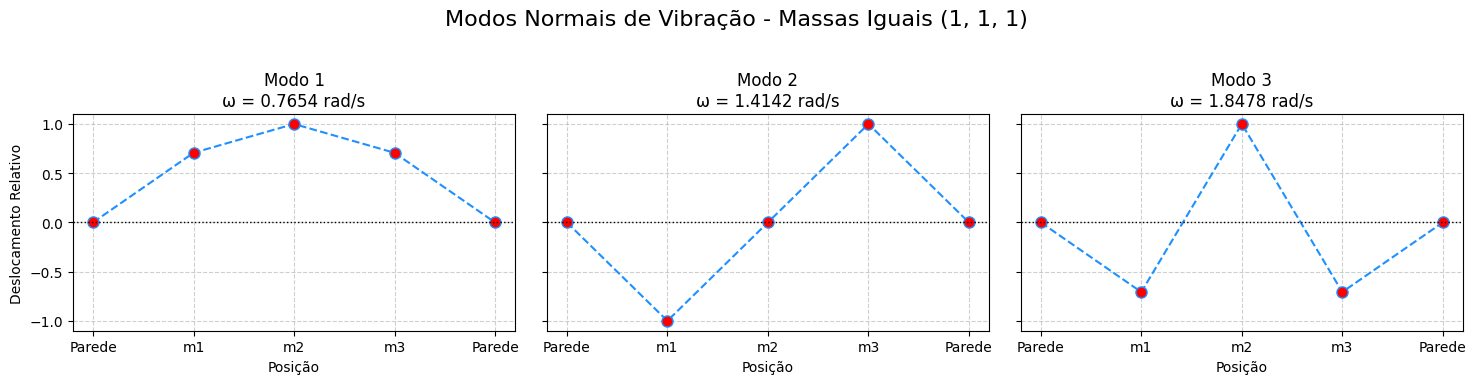

------------------------------------------------------------
Massa Central Pesada (1, 5, 1)
------------------------------------------------------------
Frequência Natural 1 (ω_1): 0.4245 rad/s
Modo Normal 1 (deslocamentos relativos): [0.5495 1.     0.5495]

Frequência Natural 2 (ω_2): 1.4142 rad/s
Modo Normal 2 (deslocamentos relativos): [-1.  0.  1.]

Frequência Natural 3 (ω_3): 1.4899 rad/s
Modo Normal 3 (deslocamentos relativos): [ 1.     -0.2198  1.    ]



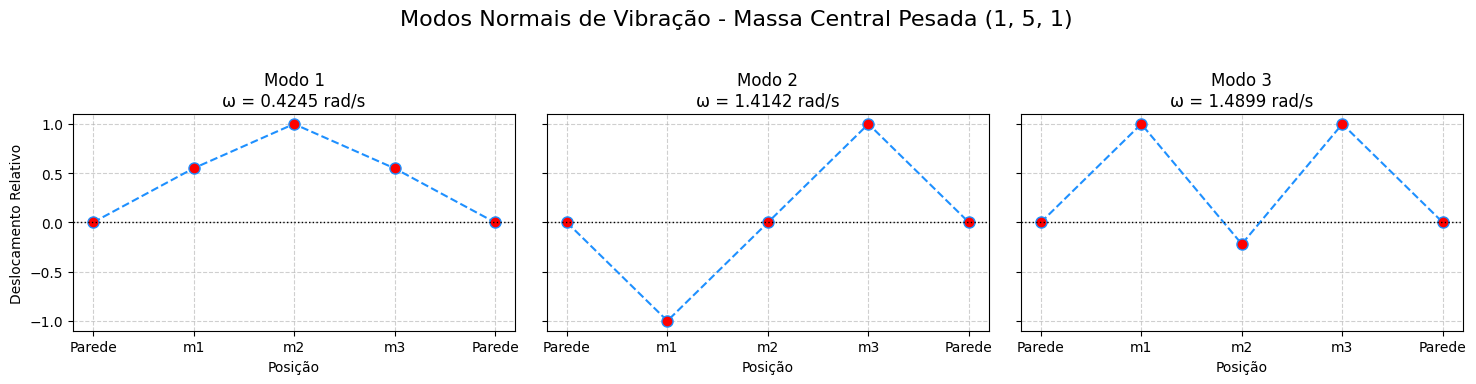

------------------------------------------------------------
Massas Crescentes (1, 2, 3)
------------------------------------------------------------
Frequência Natural 1 (ω_1): 0.5284 rad/s
Modo Normal 1 (deslocamentos relativos): [0.5811 1.     0.8604]

Frequência Natural 2 (ω_2): 1.0000 rad/s
Modo Normal 2 (deslocamentos relativos): [-1. -1.  1.]

Frequência Natural 3 (ω_3): 1.5451 rad/s
Modo Normal 3 (deslocamentos relativos): [-1.      0.3874 -0.075 ]



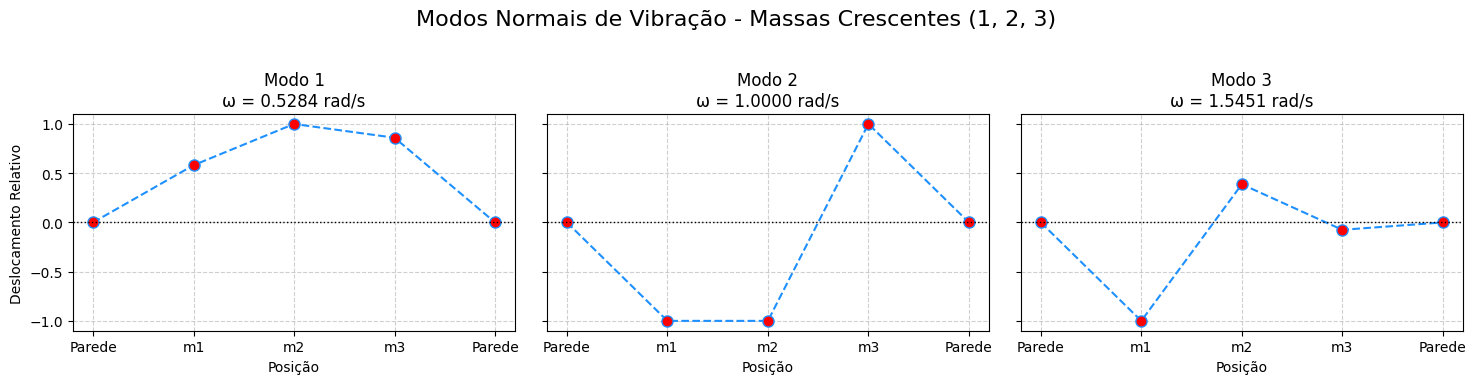

In [6]:
# 2. Sistema de 3 massas - Várias distribuições
k1, k2, k3, k4 = 1.0, 1.0, 1.0, 1.0
K_3massas = np.array([[k1 + k2, -k2, 0], [-k2, k2 + k3, -k3], [0, -k3, k3 + k4]])

distribuicoes_massa = {
    "Massas Iguais (1, 1, 1)": [1.0, 1.0, 1.0],
    "Massa Central Pesada (1, 5, 1)": [1.0, 5.0, 1.0],
    "Massas Crescentes (1, 2, 3)": [1.0, 2.0, 3.0]
}

for nome_caso, massas in distribuicoes_massa.items():
    M = np.diag(massas)
    frequencias, modos = resolver_sistema(M, K_3massas)
    imprimir_e_plotar_resultados(frequencias, modos, nome_caso)

In [1]:
import numpy as np
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.express as px
from scipy.linalg import eigh
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio

init_notebook_mode(connected=True)
pio.templates.default = "plotly_white"

In [2]:
class MassSpringSystem:
    
    def __init__(self, masses, spring_constants):
        self.masses = np.array(masses)
        self.k = np.array(spring_constants)
        self.n = len(masses) 
        
        # Valida a entrada
        if len(spring_constants) != len(masses) + 1:
            raise ValueError(f"São necessárias {len(masses) + 1} constantes de mola para {len(masses)} massas")
    
    def build_matrices(self):
        # Matriz de massa (diagonal)
        M = np.diag(self.masses)
        
        # Matriz de rigidez
        K = np.zeros((self.n, self.n))
        
        # Termos da diagonal (soma das molas conectadas a cada massa)
        for i in range(self.n):
            if i == 0:  # Primeira massa
                K[i, i] = self.k[0] + self.k[1]  # Mola da parede + primeira mola interna
            elif i == self.n - 1:  # Última massa
                K[i, i] = self.k[i] + self.k[i + 1]  # Última mola interna + mola da parede
            else:  # Massas intermediárias
                K[i, i] = self.k[i] + self.k[i + 1]  # Duas molas internas
        
        # Termos fora da diagonal (acoplamento entre massas adjacentes)
        for i in range(self.n - 1):
            K[i, i + 1] = -self.k[i + 1]
            K[i + 1, i] = -self.k[i + 1]
        
        return M, K
    
    def solve_eigenvalue_problem(self):
        M, K = self.build_matrices()
        
        # Resolve o problema de autovalor generalizado
        eigenvalues, eigenvectors = eigh(K, M)
        
        # Converte autovalores para frequências
        frequencies = np.sqrt(eigenvalues) / (2 * np.pi)
        
        # Normaliza as formas dos modos (maior amplitude = 1)
        for i in range(self.n):
            max_idx = np.argmax(np.abs(eigenvectors[:, i]))
            if eigenvectors[max_idx, i] < 0:
                eigenvectors[:, i] *= -1  

        return frequencies, eigenvectors
    
    def plot_mode_shapes_interactive(self, title="Formas dos Modos Normais"):
        frequencies, mode_shapes = self.solve_eigenvalue_problem()
        
        # Cria subplots
        fig = make_subplots(
            rows=1, cols=self.n,
            subplot_titles=[f'Modo {i+1}<br>f = {frequencies[i]:.3f} Hz' for i in range(self.n)],
            horizontal_spacing=0.1
        )
        
        positions = list(range(1, self.n + 1))  # Posições das massas
        
        colors = px.colors.qualitative.Set1[:self.n]
        
        for i in range(self.n):
            fig.add_trace(
                go.Scatter(
                    x=positions,
                    y=mode_shapes[:, i],
                    mode='markers+lines',
                    name=f'Modo {i+1}',
                    line=dict(color=colors[i], width=3),
                    marker=dict(size=12, color=colors[i]),
                    hovertemplate=f'<b>Modo {i+1}</b><br>' +
                                f'Massa %{{x}}<br>' +
                                f'Amplitude: %{{y:.3f}}<br>' +
                                f'Frequência: {frequencies[i]:.3f} Hz<extra></extra>'
                ),
                row=1, col=i+1
            )
            
            # Adiciona linha horizontal em y=0
            fig.add_hline(y=0, line_dash="dash", line_color="gray", 
                         opacity=0.5, row=1, col=i+1)
        
        fig.update_layout(
            title=dict(text=title, x=0.5, font=dict(size=16)),
            height=400,
            showlegend=False
        )
        
        # Atualiza todos os eixos dos subplots
        for i in range(self.n):
            fig.update_xaxes(title_text="Número da Massa", row=1, col=i+1)
            fig.update_yaxes(title_text="Amplitude Relativa", range=[-1.2, 1.2], row=1, col=i+1)
        
        fig.show()
        return fig

## Análise do Sistema de Duas Massas

In [3]:
def two_mass_analysis_interactive():
    print("=== ANÁLISE DO SISTEMA DE DUAS MASSAS ===")
    
    # Caso base: massas e molas iguais
    print("\n1. Caso Base: Massas iguais (1 kg cada), molas iguais (1 N/m cada)")
    system_base = MassSpringSystem([1, 1], [1, 1, 1])
    freq_base, modes_base = system_base.solve_eigenvalue_problem()
    
    print(f"Frequências naturais: {freq_base[0]:.3f} Hz, {freq_base[1]:.3f} Hz")
    system_base.plot_mode_shapes_interactive("Sistema de Duas Massas - Massas Iguais")
    
    # Varia a segunda massa
    print("\n2. Variando a segunda massa (m2) mantendo m1 = 1 kg")
    m2_values = np.linspace(0.5, 5, 100)
    freq1_list = []
    freq2_list = []
    
    for m2 in m2_values:
        system = MassSpringSystem([1, m2], [1, 1, 1])
        frequencies, _ = system.solve_eigenvalue_problem()
        freq1_list.append(frequencies[0])
        freq2_list.append(frequencies[1])
    
    # Cria o gráfico interativo de frequência
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=['Frequência vs. Razão de Massa', 'Formas dos Modos para Diferentes m2'],
        specs=[[{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    # Gráfico de variação da frequência
    fig.add_trace(
        go.Scatter(
            x=m2_values,
            y=freq1_list,
            mode='lines',
            name='1º Modo',
            line=dict(color='blue', width=3),
            hovertemplate='m2: %{x:.2f} kg<br>Frequência: %{y:.3f} Hz<extra></extra>'
        ),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Scatter(
            x=m2_values,
            y=freq2_list,
            mode='lines',
            name='2º Modo',
            line=dict(color='red', width=3),
            hovertemplate='m2: %{x:.2f} kg<br>Frequência: %{y:.3f} Hz<extra></extra>'
        ),
        row=1, col=1
    )
    
    fig.add_vline(x=1, line_dash="dash", line_color="black", opacity=0.7, row=1, col=1)
    fig.add_annotation(x=1, y=max(freq1_list), text="m2 = m1", showarrow=True, row=1, col=1)
    
    cases = [(0.5, 'm2 Leve'), (1.0, 'Massas Iguais'), (3.0, 'm2 Pesada')]
    colors = ['lightblue', 'green', 'orange']
    
    for i, (m2, label) in enumerate(cases):
        system = MassSpringSystem([1, m2], [1, 1, 1])
        frequencies, modes = system.solve_eigenvalue_problem()
        positions = [1, 2]
        
        fig.add_trace(
            go.Scatter(
                x=positions,
                y=modes[:, 0],  # Primeiro modo
                mode='markers+lines',
                name=f'{label}',
                line=dict(color=colors[i], width=3),
                marker=dict(size=10),
                hovertemplate=f'<b>{label}</b><br>' +
                            f'Massa %{{x}}<br>' +
                            f'Amplitude: %{{y:.3f}}<br>' +
                            f'f1: {frequencies[0]:.3f} Hz<extra></extra>'
            ),
            row=1, col=2
        )
    
    fig.update_xaxes(title_text="Massa m2 (kg)", row=1, col=1)
    fig.update_yaxes(title_text="Frequência Natural (Hz)", row=1, col=1)
    fig.update_xaxes(title_text="Posição da Massa", row=1, col=2)
    fig.update_yaxes(title_text="Amplitude Relativa (Modo 1)", row=1, col=2)
    
    fig.update_layout(
        title="Análise do Sistema de Duas Massas",
        height=500,
        showlegend=True
    )
    
    fig.show()

two_mass_analysis_interactive()

=== ANÁLISE DO SISTEMA DE DUAS MASSAS ===

1. Caso Base: Massas iguais (1 kg cada), molas iguais (1 N/m cada)
Frequências naturais: 0.159 Hz, 0.276 Hz



2. Variando a segunda massa (m2) mantendo m1 = 1 kg


## Análise do Sistema de Três Massas

In [4]:
def three_mass_analysis_interactive():
    print("=== ANÁLISE DO SISTEMA DE TRÊS MASSAS ===")
    
    # Diferentes configurações de massa
    configurations = [
        ([1, 1, 1], "Todas Iguais"),
        ([1, 2, 1], "Central Pesada"),
        ([2, 1, 1], "Primeira Pesada"),
        ([1, 1, 2], "Última Pesada"),
        ([1, 2, 3], "Crescente")
    ]
    
    print("\nComparando diferentes distribuições de massa:")

    results = []
    
    fig = make_subplots(
        rows=2, cols=3,
        subplot_titles=[f'{label}<br>Massas: {masses}' for masses, label in configurations],
        specs=[[{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}],
               [{"type": "scatter"}, {"type": "scatter"}, {"type": "bar"}]],
        vertical_spacing=0.15,
        horizontal_spacing=0.1
    )
    
    colors = px.colors.qualitative.Set2
    
    for i, (masses, label) in enumerate(configurations):
        system = MassSpringSystem(masses, [1, 1, 1, 1])  # Molas iguais
        frequencies, mode_shapes = system.solve_eigenvalue_problem()
        
        results.append({
            'Configuration': label,
            'Masses': str(masses),
            'Freq 1': frequencies[0],
            'Freq 2': frequencies[1],
            'Freq 3': frequencies[2]
        })
        
        if i < 5:
            row = (i // 3) + 1
            col = (i % 3) + 1
            
            positions = [1, 2, 3]
            
            for mode in range(3):
                fig.add_trace(
                    go.Scatter(
                        x=positions,
                        y=mode_shapes[:, mode],
                        mode='markers+lines',
                        name=f'Modo {mode+1}',
                        line=dict(color=colors[mode], width=2),
                        marker=dict(size=8),
                        showlegend=(i == 0),
                        hovertemplate=f'<b>{label}</b><br>' +
                                    f'Modo {mode+1}<br>' +
                                    f'Massa %{{x}}<br>' +
                                    f'Amplitude: %{{y:.3f}}<br>' +
                                    f'Frequência: {frequencies[mode]:.3f} Hz<extra></extra>'
                    ),
                    row=row, col=col
                )
            
            fig.update_xaxes(title_text="Posição da Massa", row=row, col=col)
            fig.update_yaxes(title_text="Amplitude Relativa", range=[-1.2, 1.2], row=row, col=col)
    
    df_results = pd.DataFrame(results)
    
    for mode in range(3):
        fig.add_trace(
            go.Bar(
                x=df_results['Configuration'],
                y=df_results[f'Freq {mode+1}'],
                name=f'Modo {mode+1}',
                marker_color=colors[mode],
                showlegend=False,
                hovertemplate='<b>%{x}</b><br>' +
                            f'Modo {mode+1}<br>' +
                            'Frequência: %{y:.3f} Hz<extra></extra>'
            ),
            row=2, col=3
        )
    
    fig.update_xaxes(title_text="Configuração", row=2, col=3)
    fig.update_yaxes(title_text="Frequência (Hz)", row=2, col=3)
    
    fig.update_layout(
        title="Sistema de Três Massas - Formas dos Modos para Diferentes Distribuições de Massa",
        height=800,
        showlegend=True
    )
    
    fig.show()
    
    print("\nResumo das Frequências:")
    print(df_results.to_string(index=False, float_format='%.3f'))
    
    return df_results

three_mass_results = three_mass_analysis_interactive()

=== ANÁLISE DO SISTEMA DE TRÊS MASSAS ===

Comparando diferentes distribuições de massa:



Resumo das Frequências:
  Configuration    Masses  Freq 1  Freq 2  Freq 3
   Todas Iguais [1, 1, 1]   0.122   0.225   0.294
 Central Pesada [1, 2, 1]   0.098   0.225   0.258
Primeira Pesada [2, 1, 1]   0.107   0.190   0.281
  Última Pesada [1, 1, 2]   0.107   0.190   0.281
      Crescente [1, 2, 3]   0.084   0.159   0.246


## Análise da Variação da Constante de Mola

In [5]:
def spring_variation_analysis_interactive():

    print("=== ANÁLISE DA VARIAÇÃO DA CONSTANTE DE MOLA ===")
    
    # Massas fixas, molas variáveis
    masses = [1, 1, 1]  # Três massas iguais
    
    print("\n1. Variando todas as constantes de mola igualmente")
    k_values = np.linspace(0.5, 3, 50)
    freq_results = {f'Modo {i+1}': [] for i in range(3)}
    
    for k in k_values:
        system = MassSpringSystem(masses, [k, k, k, k])
        frequencies, _ = system.solve_eigenvalue_problem()
        for i in range(3):
            freq_results[f'Modo {i+1}'].append(frequencies[i])
    
    # Cria a análise interativa de molas
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=[
            'Frequência vs. Todas as Constantes de Mola',
            'Frequência vs. Constantes de Mola da Parede',
            'Efeitos da Constante de Mola - Superfície 3D',
            'Sensibilidade da Forma do Modo'
        ],
        specs=[[{"type": "scatter"}, {"type": "scatter"}],
               [{"type": "surface"}, {"type": "scatter"}]]
    )
    
    colors = ['blue', 'red', 'green']
    
    # Gráfico 1: Todas as molas variando
    for i, (mode, freqs) in enumerate(freq_results.items()):
        fig.add_trace(
            go.Scatter(
                x=k_values,
                y=freqs,
                mode='lines+markers',
                name=mode,
                line=dict(color=colors[i], width=3),
                marker=dict(size=6),
                hovertemplate=f'<b>{mode}</b><br>' +
                            'Mola k: %{x:.2f} N/m<br>' +
                            'Frequência: %{y:.3f} Hz<extra></extra>'
            ),
            row=1, col=1
        )
    
    print("\n2. Variando molas da parede vs. molas internas")
    
    # Molas internas fixas, molas da parede variáveis
    k_wall_values = np.linspace(0.5, 3, 30)
    k_internal = 1.0
    
    wall_freq_results = {f'Modo {i+1}': [] for i in range(3)}
    
    for k_wall in k_wall_values:
        system = MassSpringSystem(masses, [k_wall, k_internal, k_internal, k_wall])
        frequencies, _ = system.solve_eigenvalue_problem()
        for i in range(3):
            wall_freq_results[f'Modo {i+1}'].append(frequencies[i])
    
    # Gráfico 2: Molas da parede variando
    for i, (mode, freqs) in enumerate(wall_freq_results.items()):
        fig.add_trace(
            go.Scatter(
                x=k_wall_values,
                y=freqs,
                mode='lines+markers',
                name=f'{mode} (parede)',
                line=dict(color=colors[i], width=3, dash='dash'),
                marker=dict(size=6, symbol='square'),
                showlegend=False,
                hovertemplate=f'<b>{mode}</b><br>' +
                            'k da Parede: %{x:.2f} N/m<br>' +
                            'Frequência: %{y:.3f} Hz<extra></extra>'
            ),
            row=1, col=2
        )
    
    # Gráfico 3: Superfície 3D mostrando efeitos combinados
    k_wall_3d = np.linspace(0.5, 2.5, 20)
    k_internal_3d = np.linspace(0.5, 2.5, 20)
    K_wall, K_internal = np.meshgrid(k_wall_3d, k_internal_3d)
    
    Z_freq1 = np.zeros_like(K_wall)
    
    for i in range(len(k_wall_3d)):
        for j in range(len(k_internal_3d)):
            system = MassSpringSystem(masses, [K_wall[j,i], K_internal[j,i], K_internal[j,i], K_wall[j,i]])
            frequencies, _ = system.solve_eigenvalue_problem()
            Z_freq1[j,i] = frequencies[0] 

    fig.add_trace(
        go.Surface(
            x=K_wall,
            y=K_internal,
            z=Z_freq1,
            colorscale='Viridis',
            name='Frequência do Modo 1',
            hovertemplate='k da Parede: %{x:.2f}<br>' +
                        'k Interno: %{y:.2f}<br>' +
                        'Frequência: %{z:.3f} Hz<extra></extra>'
        ),
        row=2, col=1
    )
    
    # Gráfico 4: Sensibilidade da forma do modo às mudanças na mola
    k_test_values = [0.5, 1.0, 1.5, 2.0]
    positions = [1, 2, 3]
    
    for i, k_test in enumerate(k_test_values):
        system = MassSpringSystem(masses, [k_test, k_test, k_test, k_test])
        frequencies, mode_shapes = system.solve_eigenvalue_problem()
        
        fig.add_trace(
            go.Scatter(
                x=positions,
                y=mode_shapes[:, 0],
                mode='lines+markers',
                name=f'k = {k_test}',
                line=dict(width=2),
                marker=dict(size=8),
                showlegend=False,
                hovertemplate=f'<b>k = {k_test} N/m</b><br>' +
                            'Massa %{x}<br>' +
                            'Amplitude: %{y:.3f}<br>' +
                            f'Frequência: {frequencies[0]:.3f} Hz<extra></extra>'
            ),
            row=2, col=2
        )
    
    fig.update_xaxes(title_text="Constante de Mola (N/m)", row=1, col=1)
    fig.update_yaxes(title_text="Frequência Natural (Hz)", row=1, col=1)
    fig.update_xaxes(title_text="Constante de Mola da Parede (N/m)", row=1, col=2)
    fig.update_yaxes(title_text="Frequência Natural (Hz)", row=1, col=2)
    fig.update_xaxes(title_text="Posição da Massa", row=2, col=2)
    fig.update_yaxes(title_text="Amplitude do Modo 1", row=2, col=2)
    
    fig.update_layout(
        title="Efeitos da Constante de Mola na Dinâmica do Sistema",
        height=900,
        showlegend=True
    )
    
    fig.show()

spring_variation_analysis_interactive()

=== ANÁLISE DA VARIAÇÃO DA CONSTANTE DE MOLA ===

1. Variando todas as constantes de mola igualmente

2. Variando molas da parede vs. molas internas


In [13]:
def create_interactive_animation(masses, springs, mode_number=1):
    system = MassSpringSystem(masses, springs)
    frequencies, mode_shapes = system.solve_eigenvalue_problem()
    
    mode_idx = mode_number - 1
    if mode_idx >= len(frequencies):
        print(f"Modo {mode_number} não disponível para este sistema")
        return
    
    n_frames = 60
    time_points = np.linspace(0, 2 * np.pi, n_frames) 
    omega = 2 * np.pi * frequencies[mode_idx]
    
    n_masses = len(masses)
    x_positions = np.arange(n_masses + 2)
    
    frames = []
    
    for i, t in enumerate(time_points):
        displacements = np.zeros(n_masses + 2)
        displacements[1:-1] = mode_shapes[:, mode_idx] * np.cos(omega * t) * 0.5
        
        frame_data = []
        
        # Paredes
        frame_data.append(go.Scatter(
            x=[x_positions[0], x_positions[-1]],
            y=[0, 0],
            mode='markers+text',
            marker=dict(size=20, color='black', symbol='square'),
            text=['Parede', 'Parede'],
            textposition='top center',
            name='Paredes',
            showlegend=(i == 0)
        ))
        
        # Massas
        mass_x = x_positions[1:-1]
        mass_y = displacements[1:-1]
        mass_labels = [f'm{j+1}<br>{masses[j]:.1f}kg' for j in range(n_masses)]
        
        frame_data.append(go.Scatter(
            x=mass_x,
            y=mass_y,
            mode='markers+text',
            marker=dict(size=25, color='red', opacity=0.8),
            text=mass_labels,
            textposition='top center',
            name='Massas',
            showlegend=(i == 0)
        ))
        
        # Molas
        molas_x = []
        molas_y = []
        for j in range(n_masses + 1):
            x_start, x_end = x_positions[j], x_positions[j+1]
            y_start, y_end = displacements[j], displacements[j+1]
            
            molas_x.extend([x_start, x_end, None])
            molas_y.extend([y_start, y_end, None])
            
        frame_data.append(go.Scatter(
            x=molas_x,
            y=molas_y,
            mode='lines',
            line=dict(color='blue', width=4),
            name='Molas',
            showlegend=(i == 0)
        ))
        
        frames.append(go.Frame(data=frame_data, name=str(i)))
    
    fig = go.Figure(
        data=frames[0].data,
        frames=frames
    )
    
    fig.update_layout(
        title=f'Animação Interativa - Modo {mode_number}<br>Frequência: {frequencies[mode_idx]:.3f} Hz',
        xaxis=dict(range=[-0.5, n_masses + 1.5], title='Posição'),
        yaxis=dict(range=[-1, 1], title='Deslocamento'),
        updatemenus=[{
            'type': 'buttons',
            'showactive': False,
            'buttons': [
                {
                    'label': 'Executar',
                    'method': 'animate',
                    'args': [None, {
                        'frame': {'duration': 100, 'redraw': True},
                        'fromcurrent': True,
                        'transition': {'duration': 0}
                    }]
                },
                {
                    'label': 'Pausar',
                    'method': 'animate',
                    'args': [[None], {
                        'frame': {'duration': 0, 'redraw': False},
                        'mode': 'immediate',
                        'transition': {'duration': 0}
                    }]
                }
            ]
        }],
        height=500
    )
    
    fig.show()

print("\nAnimação 1: Sistema de duas massas, Modo 1")
create_interactive_animation([1, 1], [1, 1, 1], mode_number=1)

print("\nAnimação 2: Sistema de três massas, Modo 2")
create_interactive_animation([1, 2, 1], [1, 1, 1, 1], mode_number=2)


Animação 1: Sistema de duas massas, Modo 1



Animação 2: Sistema de três massas, Modo 2


In [7]:
def create_parameter_exploration_dashboard():
    print("=== EXPLORAÇÃO INTERATIVA DE PARÂMETROS ===")
    
    # Cria um dashboard abrangente
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=[
            'Efeito da Massa nas Frequências',
            'Efeito da Mola nas Frequências', 
            'Evolução da Forma do Modo',
            'Distribuição de Energia do Sistema'
        ],
        specs=[[{"type": "scatter"}, {"type": "scatter"}],
               [{"type": "scatter"}, {"type": "bar"}]]
    )
    
    # Varredura do parâmetro de massa
    m2_range = np.linspace(0.1, 5, 50)
    freq1_mass, freq2_mass = [], []
    
    for m2 in m2_range:
        system = MassSpringSystem([1, m2], [1, 1, 1])
        freqs, _ = system.solve_eigenvalue_problem()
        freq1_mass.append(freqs[0])
        freq2_mass.append(freqs[1])
    
    # Adiciona traços do efeito da massa
    fig.add_trace(go.Scatter(
        x=m2_range, y=freq1_mass,
        mode='lines', name='Modo 1 (massa)',
        line=dict(color='blue', width=3)
    ), row=1, col=1)
    
    fig.add_trace(go.Scatter(
        x=m2_range, y=freq2_mass,
        mode='lines', name='Modo 2 (massa)',
        line=dict(color='red', width=3)
    ), row=1, col=1)
    
    # Varredura do parâmetro de mola
    k_range = np.linspace(0.1, 5, 50)
    freq1_spring, freq2_spring = [], []
    
    for k in k_range:
        system = MassSpringSystem([1, 1], [k, k, k])
        freqs, _ = system.solve_eigenvalue_problem()
        freq1_spring.append(freqs[0])
        freq2_spring.append(freqs[1])
    
    # Adiciona traços do efeito da mola
    fig.add_trace(go.Scatter(
        x=k_range, y=freq1_spring,
        mode='lines', name='Modo 1 (mola)',
        line=dict(color='darkblue', width=3, dash='dash'),
        showlegend=False
    ), row=1, col=2)
    
    fig.add_trace(go.Scatter(
        x=k_range, y=freq2_spring,
        mode='lines', name='Modo 2 (mola)',
        line=dict(color='darkred', width=3, dash='dash'),
        showlegend=False
    ), row=1, col=2)
    
    # Evolução da forma do modo
    test_masses = [0.5, 1.0, 2.0, 4.0]
    positions = [1, 2]
    
    for i, m2 in enumerate(test_masses):
        system = MassSpringSystem([1, m2], [1, 1, 1])
        _, modes = system.solve_eigenvalue_problem()
        
        fig.add_trace(go.Scatter(
            x=positions, y=modes[:, 0],
            mode='lines+markers', 
            name=f'm2={m2}',
            marker=dict(size=8),
            showlegend=False
        ), row=2, col=1)
    
    # Distribuição de energia (cinética vs. potencial em diferentes fases)
    phases = ['EC Máxima', 'EP Máxima', 'Mista']
    energies = [0.6, 0.4, 0.5]
    
    fig.add_trace(go.Bar(
        x=phases, y=energies,
        name='Energia',
        marker_color='orange',
        showlegend=False
    ), row=2, col=2)
    
    # Atualiza o layout
    fig.update_xaxes(title_text="Massa m2 (kg)", row=1, col=1)
    fig.update_yaxes(title_text="Frequência (Hz)", row=1, col=1)
    fig.update_xaxes(title_text="Constante de Mola (N/m)", row=1, col=2)
    fig.update_yaxes(title_text="Frequência (Hz)", row=1, col=2)
    fig.update_xaxes(title_text="Posição da Massa", row=2, col=1)
    fig.update_yaxes(title_text="Amplitude do Modo 1", row=2, col=1)
    fig.update_xaxes(title_text="Fase", row=2, col=2)
    fig.update_yaxes(title_text="Energia Relativa", row=2, col=2)
    
    fig.update_layout(
        title="Dashboard Interativo de Exploração de Parâmetros",
        height=800,
        showlegend=True
    )
    
    fig.show()

create_parameter_exploration_dashboard()

=== EXPLORAÇÃO INTERATIVA DE PARÂMETROS ===


### 1. Efeitos da Massa nas Frequências Naturais
- **Relação de Inverso da Raiz Quadrada**: As frequências naturais seguem a relação ω ∝ 1/√m, confirmando as previsões teóricas.
- **Sensibilidade Específica do Modo**: As frequências diminuem mais significativamente quando massas com maiores amplitudes de modo são aumentadas.
- **Distribuição Assimétrica de Massa**: Cria uma separação de frequências e quebra a simetria da forma do modo.

### 2. Características dos Modos Normais
- **Modo 1 (Fundamental)**: As massas oscilam predominantemente em fase, com a frequência mais baixa.
- **Modo 2 (Primeiro Harmônico)**: Relações de fase mistas, frequência intermediária.
- **Modo 3 (Segundo Harmônico)**: As massas oscilam predominantemente fora de fase, com a frequência mais alta.
- **Localização de Modo**: Ocorre quando uma massa difere significativamente das outras.

### 3. Efeitos da Constante de Mola
- **Molas de Conexão**: Afetam principalmente os modos de ordem superior com movimento relativo significativo.
- **Molas da Parede**: Influenciam todos os modos, mas o efeito é mais forte nos modos com grande movimento das massas das extremidades.
- **Escalonamento de Frequência**: Todas as frequências escalam como √k para mudanças uniformes na constante de mola.

### 4. Aplicações de Engenharia
- **Isolamento de Vibrações**: A compreensão das formas dos modos permite o projeto de amortecimento direcionado.
- **Prevenção de Ressonância**: A análise de frequência previne condições de ressonância destrutiva.
- **Otimização Estrutural**: A distribuição de massa e rigidez pode ser ajustada para a dinâmica desejada.

## Exemplos Adicionais e Testes

In [8]:
print("=== EXEMPLOS ADICIONAIS ===")

# Exemplo 1: Sistema personalizado de duas massas
print("\nExemplo 1: Sistema personalizado de duas massas")
custom_system = MassSpringSystem([0.5, 2.0], [1.5, 0.8, 1.2])
custom_system.plot_mode_shapes_interactive("Sistema Personalizado de Duas Massas")

# Exemplo 2: Sistema de quatro massas
print("\nExemplo 2: Sistema de quatro massas")
four_mass_system = MassSpringSystem([1, 1.5, 0.8, 1.2], [1, 1, 1, 1, 1])
four_mass_system.plot_mode_shapes_interactive("Sistema de Quatro Massas")

=== EXEMPLOS ADICIONAIS ===

Exemplo 1: Sistema personalizado de duas massas



Exemplo 2: Sistema de quatro massas
